# Assignment Details

Find a dataset of your choice, ask five questions based on the data, then answer those questions using the data provided in the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Questions**

1) What is the most popular platfrom in NA, Europe, Japan, and the world as a whole based on games being purchased?

2) What was the best year, quarter, and month for games sold?

3) What genre is the most popular based on global sales, and does a lower rating affect sales? Which genre seems to do the best, regardless of the rating?

4) Do the critics actually represent the thoughts of the public?

5) Are publishers consistent in publishing popular games?

The following data was obtained from github, at the following link: https://raw.githubusercontent.com/wtamu-cisresearch/scraper/master/gamedata-20140215-11_53_10.csv

In [2]:
url = "https://raw.githubusercontent.com/wtamu-cisresearch/scraper/master/gamedata-20140215-11_53_10.csv"

In [3]:
vg_data = pd.read_csv(url, skiprows=1)

In [4]:
vg_data.head()

,name,platform,release year,genre,publisher,north america sales,europe sales,japan sales,rest of world sales,global sales,release date,critic score,critic outof,critic count,user score,user count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.02,28.66,3.77,8.39,81.84,"Nov 19, 2006",76.0,100.0,51.0,8.2,229.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.07,12.36,3.71,3.19,34.33,"Apr 27, 2008",82.0,100.0,73.0,8.2,503.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.38,10.71,3.25,2.89,32.24,"Jul 26, 2009",80.0,100.0,73.0,7.7,132.0,Nintendo,E
3,Wii Play,Wii,2006.0,Misc,Nintendo,13.89,9.14,2.93,2.83,28.79,"Feb 12, 2007",58.0,100.0,41.0,6.5,103.0,Nintendo,E
4,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,13.85,6.57,4.69,2.14,27.25,"Nov 15, 2009",87.0,100.0,80.0,8.3,446.0,Nintendo,E


In [5]:
vg_data.shape

(5441, 18)

In [6]:
vg_data.dtypes

name                    object
platform                object
release year           float64
genre                   object
publisher               object
north america sales    float64
europe sales           float64
japan sales            float64
rest of world sales    float64
global sales           float64
release date            object
critic score           float64
critic outof           float64
critic count           float64
user score              object
user count             float64
developer               object
rating                  object
dtype: object

In [7]:
# Cleaning up the data to change the data types.
# We don't care about anything without a valid release date, as that could mess with all of the other data.
vg_data['release date'] = vg_data['release date'].replace(['TBA', 'Canceled','Q2 2014','TBA 2014','June 2010','TBA 2013','Q2 2011','2007','April 2010','August 2011'], None)
vg_data['user score'] = vg_data['user score'].replace(['TBA', 'tbd'],None)
vg_data['rating'] = vg_data['rating'].replace(['RP', 'EC'], None)

In [8]:
vg_data['release date'] = pd.to_datetime(vg_data['release date'], format='%b %d, %Y')
vg_data['user score'] = pd.to_numeric(vg_data['user score'])

In [9]:
vg_data.dropna()

,name,platform,release year,genre,publisher,north america sales,europe sales,japan sales,rest of world sales,global sales,release date,critic score,critic outof,critic count,user score,user count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.02,28.66,3.77,8.39,81.84,2006-11-19,76.0,100.0,51.0,8.2,229.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.07,12.36,3.71,3.19,34.33,2008-04-27,82.0,100.0,73.0,8.2,503.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.38,10.71,3.25,2.89,32.24,2009-07-26,80.0,100.0,73.0,7.7,132.0,Nintendo,E
3,Wii Play,Wii,2006.0,Misc,Nintendo,13.89,9.14,2.93,2.83,28.79,2007-02-12,58.0,100.0,41.0,6.5,103.0,Nintendo,E
4,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,13.85,6.57,4.69,2.14,27.25,2009-11-15,87.0,100.0,80.0,8.3,446.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,Kokuga,3DS,2012.0,Action,G.Rev,0.00,0.00,0.01,0.00,0.01,2013-06-27,77.0,100.0,14.0,7.1,15.0,G.Rev,E
5403,After Burner: Black Falcon,PSP,2007.0,Simulation,Sega,0.01,0.00,0.00,0.00,0.01,2007-03-20,73.0,100.0,30.0,6.6,7.0,Planet Moon Studios,T
5406,Sniper Elite V2,WiiU,2013.0,Shooter,505 Games,0.00,0.01,0.00,0.00,0.01,2013-05-21,58.0,100.0,5.0,5.6,20.0,Rebellion,M
5438,Hyperdimension Neptunia mk2,PS3,2011.0,Action,Nippon Ichi Software,0.00,0.00,0.00,0.00,0.01,2012-02-28,53.0,100.0,16.0,7.9,90.0,Idea Factory,M


**Question 1: What is the most popular platfrom in NA, Europe, Japan, and the world as a whole based on games being purchased?**

In [10]:
total_sales_NA = vg_data.groupby('platform')['north america sales'].sum()
total_sales_Europe = vg_data.groupby('platform')['europe sales'].sum()
total_sales_Japan = vg_data.groupby('platform')['japan sales'].sum()
total_sales_Global = vg_data.groupby('platform')['global sales'].sum()

In [11]:
total_sales_NA.sort_values(ascending=False).head()

platform
X360    524.67
Wii     479.01
PS3     332.45
PSP     104.98
3DS      42.68
Name: north america sales, dtype: float64

In [12]:
total_sales_Europe.sort_values(ascending=False).head()

platform
PS3     267.98
Wii     246.38
X360    233.02
PSP      63.85
3DS      26.11
Name: europe sales, dtype: float64

In [13]:
total_sales_Japan.sort_values(ascending=False).head()

platform
PSP     76.74
Wii     68.87
PS3     67.19
3DS     50.47
X360    12.38
Name: japan sales, dtype: float64

In [14]:
total_sales_Global.sort_values(ascending=False).head()

platform
Wii     871.12
X360    843.72
PS3     772.43
PSP     284.76
3DS     125.65
Name: global sales, dtype: float64

**What is the most popular platfrom in NA, Europe, Japan, and the world as a whole based on games being purchased?**

Xbox 360 was the most popular in NA, PS3 was the most popular in Europe, and PSP was most popular in Japan. The Wii was the second in each of those locations and was the most poplular in the world at the time.

**Question 2: What was the best year, quarter, and month for games sold?**

In [15]:
vg_data['Quarter'] = vg_data['release date'].dt.to_period('Q')
vg_data['Month'] = vg_data['release date'].dt.to_period('M')

In [16]:
year_sales = vg_data.groupby('release year')['global sales'].sum()
quarter_sales = vg_data.groupby('Quarter')['global sales'].sum()
month_sales = vg_data.groupby('Month')['global sales'].sum()

In [17]:
year_sales.sort_values(ascending=False).head()

release year
2009.0    471.90
2010.0    445.61
2008.0    441.06
2011.0    400.83
2007.0    357.49
Name: global sales, dtype: float64

In [18]:
quarter_sales.sort_values(ascending=False).head(10)

Quarter
2010Q4    230.49
2009Q4    215.91
2011Q4    203.52
2008Q4    182.09
2006Q4    166.28
2007Q4    158.73
2008Q2    137.97
2012Q4    113.60
2009Q3    107.96
2013Q4     72.28
Freq: Q-DEC, Name: global sales, dtype: float64

In [19]:
month_sales.sort_values(ascending=False).head(10)

Month
2010-11    147.64
2006-11    136.42
2009-11    113.92
2011-11    113.60
2007-11     99.44
2008-10     94.80
2009-10     93.74
2010-10     78.46
2011-10     78.24
2008-11     77.76
Freq: M, Name: global sales, dtype: float64

**What was the best year, quarter, and month for games sold?**

While the year data is not necessarily super useful, we can see that Q4 is the best quarter for sales. This makes sense since we expect people to be buying games for others around the holiday, and follows a trend of a lot of the biggest games being released September and later in the year. The month data shows the November has the highest sales out of any month in almost every year, with October being right after it.

**Question 3: What genre is the most popular based on global sales, and does a lower rating affect sales? Which genre seems to do the best, regardless of the rating?**

In [20]:
genre_sales = vg_data.groupby('genre')['global sales'].sum()

In [21]:
genre_sales.sort_values(ascending=False).head(10)

genre
Action          610.47
Sports          561.08
Shooter         469.28
Misc            338.75
Racing          229.27
Role-Playing    208.64
Platform        170.01
Adventure       124.62
Fighting        124.41
Simulation       68.11
Name: global sales, dtype: float64

<AxesSubplot:title={'center':'Total Global Sales by Genre'}, xlabel='genre'>

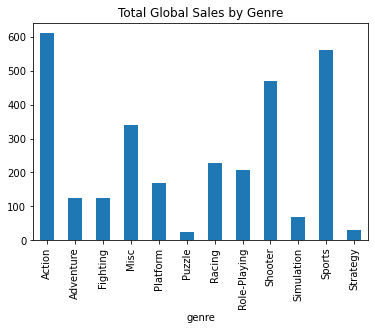

In [22]:
%matplotlib inline
genre_sales.plot(x='genre', y='global sales', kind='bar', title='Total Global Sales by Genre')

In [23]:
rating_sales = vg_data.groupby('rating')['global sales'].sum()

In [24]:
rating_sales.sort_values(ascending=False).head()

rating
E       934.38
M       781.88
T       573.68
E10+    357.45
Name: global sales, dtype: float64

<AxesSubplot:title={'center':'Total Global Sales by Rating'}>

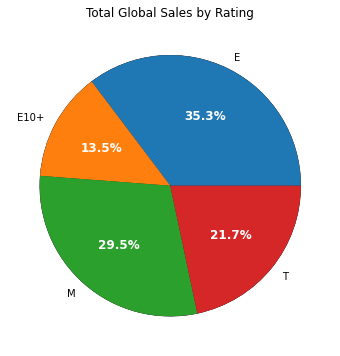

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x=rating_sales,autopct='%.1f%%', textprops={'size': 'large', 'color':'w', 'weight':'bold'}, wedgeprops = {"edgecolor" : "black",
                      'linewidth': .5,
                      'antialiased': True})
rating_sales.plot(x='rating', y='global sales', kind='pie', title='Total Global Sales by Rating', ylabel='')

In [26]:
stacked_sales = vg_data.groupby(['genre','rating'])['global sales'].sum()

In [27]:
stacked_sales.sort_values(ascending=False).head()

genre    rating
Sports   E         434.20
Shooter  M         390.02
Action   M         256.47
         T         148.70
Racing   E         138.16
Name: global sales, dtype: float64

In [28]:
unstacked_sales = vg_data.groupby(['genre','rating'])['global sales'].sum().unstack()

In [29]:
unstacked_sales.sort_values('genre',ascending=False).head(15)

rating,E,E10+,M,T
genre,,,,
Strategy,0.95,7.28,1.48,9.14
Sports,434.20,34.74,0.56,29.45
Simulation,29.41,8.33,0.52,20.35
Shooter,0.87,8.30,390.02,60.91
Role-Playing,4.54,9.72,78.51,68.67
Racing,138.16,38.23,0.51,32.95
Puzzle,13.82,3.87,NaN,0.77
Platform,108.86,38.30,0.61,2.91
Misc,136.12,80.18,1.16,82.18


<AxesSubplot:title={'center':'Total Global Sales by Genre, Rating'}, xlabel='genre'>

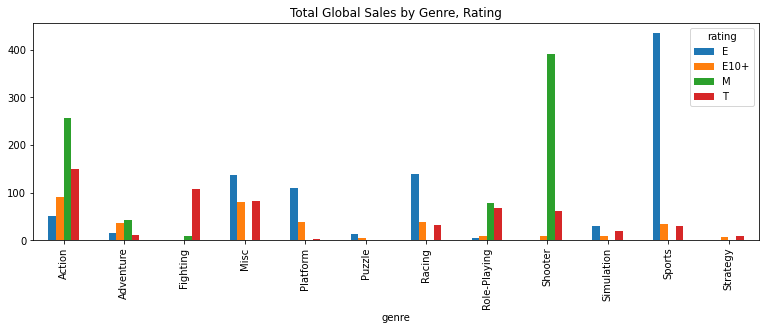

In [30]:
unstacked_sales.plot(kind='bar', figsize=(13,4), title='Total Global Sales by Genre, Rating')

**What genre is the most popular based on global sales, and does a lower rating affect sales? Which genre seems to do the best, regardless of the rating?**

Ratings definetely play a part in specific genre sales, but video games as a whole seem to sell well regardless of the rating.

**Question 4: Do the critics actually represent the thoughts of the public?**

In [31]:
groupby_columns = [
    'genre',
]

agg_dict = {
    'critic score': ['mean'],
    'user score': ['mean'],
    'global sales': ['sum']
}

Q4_data = vg_data.groupby(groupby_columns).agg(agg_dict)
Q4_data = Q4_data.reset_index()
Q4_data.columns = ['genre','critic score','user score', 'global sales']
Q4_data['user score'] = Q4_data['user score']*10
Q4_data.head(20)

,genre,critic score,user score,global sales
0,Action,65.478142,67.950327,610.47
1,Adventure,65.556291,70.052632,124.62
2,Fighting,70.698413,70.771277,124.41
3,Misc,66.289575,66.563050,338.75
4,Platform,68.531469,71.108844,170.01
5,Puzzle,65.323077,65.901639,23.69
6,Racing,67.344681,66.966165,229.27
7,Role-Playing,70.630631,73.811404,208.64
8,Shooter,69.799451,68.340599,469.28
9,Simulation,64.000000,67.451613,68.11


In [32]:
Q4_data.sort_values('global sales',ascending=False).head(12)

,genre,critic score,user score,global sales
0,Action,65.478142,67.950327,610.47
10,Sports,69.599585,66.524412,561.08
8,Shooter,69.799451,68.340599,469.28
3,Misc,66.289575,66.563050,338.75
6,Racing,67.344681,66.966165,229.27
7,Role-Playing,70.630631,73.811404,208.64
4,Platform,68.531469,71.108844,170.01
1,Adventure,65.556291,70.052632,124.62
2,Fighting,70.698413,70.771277,124.41
9,Simulation,64.000000,67.451613,68.11


<AxesSubplot:title={'center':'Users vs Critics'}, xlabel='critic score', ylabel='user score'>

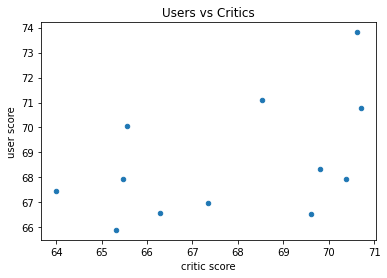

In [36]:
Q4_data.plot(x='critic score',y='user score',kind='scatter', title='Users vs Critics')

**Do the critics actually represent the thoughts of the public?**

The critic scores seem to represent the consumers pretty well, from less than a point off to 5 points off, depending on the genre.

**Question 5: Are publishers consistent in publishing popular games?**

In [100]:
groupby_columns = [
    'publisher',
]

agg_dict = {
    'publisher': ['count'],
    'critic score': ['mean', 'std'],
    'user score': ['mean', 'std'],
    'global sales': ['sum']
}

Q5_data = vg_data.groupby(groupby_columns).agg(agg_dict)
Q5_data = Q5_data.reset_index()
Q5_data.columns = ['publisher','games by publisher','critic score avg','critic score std dev','user score avg','user score std dev', 'global sales']
Q5_data['user score avg'] = Q5_data['user score avg']*10
Q5_data.head(20)

,publisher,games by publisher,critic score avg,critic score std dev,user score avg,user score std dev,global sales
0,49Games,1,NaN,NaN,NaN,NaN,0.01
1,505 Games,86,58.285714,14.544472,58.774194,1.997984,26.46
2,5pb,52,67.000000,NaN,77.000000,0.989949,1.22
3,7G//AMES,2,NaN,NaN,NaN,NaN,0.02
4,AQ Interactive,1,NaN,NaN,NaN,NaN,0.02
5,ASCII Media Works,3,NaN,NaN,NaN,NaN,0.12
6,Abylight,1,NaN,NaN,NaN,NaN,0.07
7,Ackkstudios,9,75.000000,NaN,70.000000,NaN,0.75
8,Acquire,13,61.000000,NaN,71.000000,NaN,1.00
9,Activision,382,66.601626,14.869907,62.437086,1.652184,312.34


In [101]:
Q5_data.dropna()

,publisher,games by publisher,critic score avg,critic score std dev,user score avg,user score std dev,global sales
1,505 Games,86,58.285714,14.544472,58.774194,1.997984,26.46
9,Activision,382,66.601626,14.869907,62.437086,1.652184,312.34
10,Activision Value,18,45.166667,5.879342,59.461538,1.894560,4.37
21,Atari,68,63.340426,13.852133,68.000000,1.501627,18.27
22,Atlus,19,78.125000,5.841661,79.375000,0.678101,3.55
...,...,...,...,...,...,...,...
231,XS Games,5,46.500000,23.334524,59.666667,1.556706,0.90
232,Xplosiv,6,53.000000,12.942179,81.500000,0.238048,0.89
233,Xseed Games,2,63.000000,21.213203,73.500000,0.212132,0.45
237,Zoo Digital Publishing,19,37.714286,16.740313,64.200000,1.791833,2.24


In [102]:
Q5_data.sort_values('global sales', ascending=False)

,publisher,games by publisher,critic score avg,critic score std dev,user score avg,user score std dev,global sales
144,Nintendo,137,75.148936,11.627699,76.815217,1.015260,467.46
61,Electronic Arts,471,73.159204,11.705425,68.040284,1.365561,402.22
9,Activision,382,66.601626,14.869907,62.437086,1.652184,312.34
220,Ubisoft,352,66.259414,15.003349,68.399306,1.438799,227.43
206,Take-Two Interactive,176,75.985294,13.235746,71.528302,1.297310,189.38
...,...,...,...,...,...,...,...
195,Sunrise Interactive,1,NaN,NaN,NaN,NaN,0.01
197,System 3,1,36.000000,NaN,NaN,NaN,0.01
200,SystemSoft,1,NaN,NaN,NaN,NaN,0.01
201,SystemSoft Alpha,1,NaN,NaN,NaN,NaN,0.01


<AxesSubplot:xlabel='critic score avg', ylabel='global sales'>

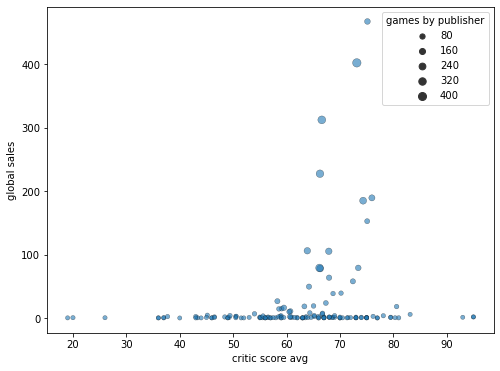

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

sns.scatterplot(
    x='critic score avg',
    y='global sales',
    data=Q5_data,
    edgecolor='k',
    alpha=0.6,
    size='games by publisher'
)

Global Sales by User Score


<AxesSubplot:xlabel='user score avg', ylabel='global sales'>

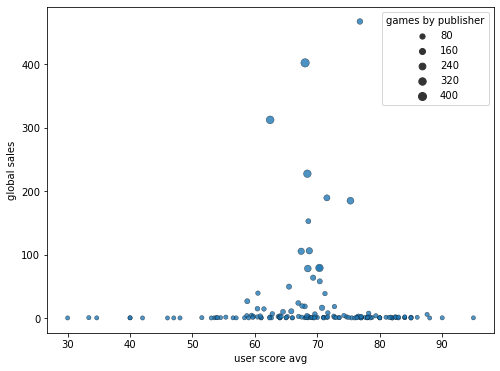

In [104]:
print("Global Sales by User Score")

fig, ax = plt.subplots(1, 1, figsize=(8,6))

sns.scatterplot(
    x='user score avg',
    y='global sales',
    data=Q5_data,
    edgecolor='k',
    alpha=0.8,
    size='games by publisher'
)

**Are publishers consistent in publishing popular games?**

Neither sales nor number of published games seem to affect the rating from users or critics